# Predicting churn probability of Bank Customers

## Phase 1 : Data Preparation & Visualisation

### Group 29


|Name | Student ID
|-----|-----|
|Aishwarya Thomas| S3962715
|Deepa Rose Thomas| S3952532

# Table of Contents
* [Introduction](#Introduction)
   + [Dataset Source](#Datasetsource)
   + [Dataset Details](#Datasetdetails)
   + [Dataset Features](#Datasetfeatures)
   + [Target Feature](#targetfeature)
* [Goals and Objectives](#goals)
* [Data Cleaning and Preprocessing](#datacleaning)
* [Data Exploration and Visualisation](#dataexploration)
* [Literature Review](#literature)
* [Summary and Conclusion](#summary)
* [References](#references)


## Introduction <a name = 'Introduction'></a>

<div style="text-align: justify">Even though banks and banking system have transformed over the decades, many banks today with a an average customer base targets to have a competitive edge.
Customer retention is something every one considers important, banks can do very little about the churn of customers, especially if they cannot foresee it in the first place.  <br><br>In such a scenario, predicting the customer churn at the right instanct becomes extreemly important. Accuracy and time consistency in churn prediction enables the Customer Relations and Customer Experience teams to be more proactive while engaging with customers</div>

### Dataset Source <a name = 'Datasetsource'></a>

<div style="text-align: justify">The Churn prediction data set of bank customers used in our study has been taken from Github. This data set contains the banking related information of customers from the year 2019.</div>

### Dataset Details <a name = 'Datasetdetails'></a>

<div style="text-align: justify">Here we have a dataset which contains the details of the bank customers. The basic attributes to identify a customer, is provided in the form of a unique customer ID and a surname field. <br><br>Certain additional features provided in the dataset are the Creditscore which indicates a consumer's creditworthiness, Geography, Gender, Age, Tenure, Balance, Number of bank products used by the customer and the Number of credit cards issued by the bank to the customer. These features seem to adequate enough to predict the churn for banking customers as a classification problem. <br>
The dataset has a total of 13 features excludng the row numbers of the records and 10000 observations.</div>

#### Dataset Retrieval 

* <div style="text-align: justify"> We retrieve the dataset from Github repository and load the modules that we use in this report
* We exhibit 10 randomly sampled rows from the dataset

In [1]:
#importing the required packages
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests
pd.set_option('display.max_columns', None) 
###
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as py #visualization
py.init_notebook_mode(connected=True) #visualization
import plotly.graph_objs as go #visualization
import plotly.tools as tls #visualization
import plotly.figure_factory as ff
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("seaborn")
###


In [2]:
#name of the dataset imported from Github
df_name = 'data.csv'

In [3]:
df_url = 'https://raw.githubusercontent.com/Pradnya1208/Bank-customers-churn-prediction/main/' + df_name
url_content = requests.get(df_url, verify=False).content
churncustomer_df = pd.read_csv(io.StringIO(url_content.decode('utf-8')))

In [4]:
#displaying 10 random rows from the dataset
churncustomer_df.sample(10, random_state = 999)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9031,9032,15742323,Barese,541,France,Male,39,7,0.00,2,1,0,19823.02,0
3462,3463,15713596,Ugochukwu,428,France,Female,62,1,107735.93,1,0,1,58381.77,0
3863,3864,15645095,Huang,674,France,Female,28,3,0.00,1,1,0,51536.99,0
1144,1145,15694821,Hardy,765,Germany,Male,43,4,148962.76,1,0,1,173878.87,1
2692,2693,15736274,Prokhorova,751,France,Male,31,8,0.00,2,0,0,17550.49,0
9541,9542,15669290,Fan,603,France,Male,38,8,59360.77,1,1,1,191457.06,0
2227,2228,15744368,Sun,633,Spain,Male,58,6,98308.51,1,1,1,132034.13,0
210,211,15752047,Trevisano,689,Germany,Male,33,2,161814.64,2,1,0,169381.90,0
5709,5710,15606158,Genovese,644,France,Female,39,9,0.00,1,1,0,3740.93,0
9334,9335,15777217,Somadina,641,Spain,Male,25,10,0.00,2,1,1,180808.39,0


### Dataset Features<a name = Datasetfeatures></a>

<div style ='justify'>The features of our dataset are explained in the table below. These interpretation is taken from the Kaggle repository</div>

In [5]:
from prettytable import PrettyTable
  
# Specify the Column Names while initializing the Table

table = PrettyTable(["Attribute Name", "Data type", "Units", "Description"])
table.title = 'Dataset Features'
table._max_width = {"Description":50,"Attribute Name":20,"Data type":15,"Unit":5} 
table.add_row(["Rownumber", "Numerical", "N/A", "Row numbers from 1-10000"])
table.add_row(["CustomerID", "Numerical", "N/A", "Unique ID that identifies each customer"])
table.add_row(["Surname", "Label", "N/A", ""])
table.add_row(["Creditscore", "Numerical", "N/A", "Number between 30-0-850 which represents customer's creditworthiness"])
table.add_row(["Geography", "Categorical", "N/A", "The country which the customer belongs to"])
table.add_row(["Gender", "Categorical", "N/A", "The customer’s gender: Male, Female"])
table.add_row(["Age", "Continuous", "N/A", "The customer’s current age, in years, at the time of being customer"])
table.add_row(["Tenure", "Continuous", "N/A", "Years of assosiation of the customer with the bank"])  
table.add_row(["Balance", "Continuous", "USD ", "Bank balance of the customer."])
table.add_row(["Numofproducts", "Continuous", "N/A", "Number of bank products utilised by the customer"])
table.add_row(["Hascrcard", "Binary", "N/A", "The number of credit cards given to the customer by the bank"])
table.add_row(["Isactivemember:", "Binary", "N/A", "Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable 'exited')"])
table.add_row(["EstimatedSalary:", "Continuos", "USD", "Estimated Salary of the customer"])
table.add_row(["Exited:", "Binary", "N/A", "Binary flag 1 if the customer closed the account and 0 if the customer is retained"])
table.align = "l"
print(table)

+---------------------------------------------------------------------------------------------+
|                                       Dataset Features                                      |
+------------------+-------------+-------+----------------------------------------------------+
| Attribute Name   | Data type   | Units | Description                                        |
+------------------+-------------+-------+----------------------------------------------------+
| Rownumber        | Numerical   | N/A   | Row numbers from 1-10000                           |
| CustomerID       | Numerical   | N/A   | Unique ID that identifies each customer            |
| Surname          | Label       | N/A   |                                                    |
| Creditscore      | Numerical   | N/A   | Number between 30-0-850 which represents           |
|                  |             |       | customer's creditworthiness                        |
| Geography        | Categorical | N/A  

### Target Feature <a name = targetfeature></a>

<div style="text-align: justify">The target feature in this dataset will be the Exited field which indicates whether a customer is likely to churn. Thus, we try to predict the likelyhood of customer churn based on the data points that describe the customers.<br>
<div style= 'justify'>This feature is a binary variable with 2 values - 0 depicting a retained customer and 1 depicting a churned customer</div>

## Goals and Objectives<a name = 'goals'></a>

<div style="text-align: justify">The main objective of predicting churn for bank customers is to detect those who may leave the bank and prevent it by taking proactive steps. This is done by creating models that use past customer data to anticipate the likelihood of a customer leaving the bank soon. The goals of this churn prediction process include<br>

1. Retaining Profitable customers : Churn prediction can identify the profitable customers who are at risk of leaving the bank and take preparatory measure to retain them, thery by increasing the revenue and profitability of banks <br>
2. Cost Reduction: Getting new customers is often more expensive than retaining existing ones. Churn prediction helps banks in reducing customer acquision costs by keeping the existing customers<br>
3. Customer Satisfaction: By identifying the factors that drive customer churn, banks can take corrective actions to improve the customer satisfaction. Thus churn prediction can result in increased customer loyalty and retention<br>
4. Better strategies for marketing: Churn prediction gives insights into customer preferneces and behaviours, thus enabling for targetted marketing strategies.<br>
5. Risk management: Banks can manage risk by identifying customers who are likely to defer loans and credit card payments.<br>

Therefore the main goal of churn prediction of bank customers is to identify the customer with high likelyhood of leaving the bank, and take measures to retain them. Churn prediction aims at retaining profitable customers, reducing costs, better customer satisfaction, risk management and improved marketing strategies. Banks can have better revenue, profitability and customer loyalty by achieving these objectives
 

</div>


## Data Cleaning and Preprocessing <a name = 'datacleaning'></a>

In this section, we undertake the cleaning and preprocessing of our dataset

### Data Cleaning Steps
* Understanding the data
* Drop irrelevent columns and modify existing columns
* Check missing values
* Check for outliers
* Random sampling of dataset for 5000 rows

#### Understanding the data

In [6]:
##Getting an idea about the dataset in general

In [7]:
churncustomer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


* The dataset has 14 columns and 10000 observations
* We have 11 columns with numerical data and 3 columns with categorical values
* We have no missing values in the dataset


In [8]:
churncustomer_df.shape

(10000, 14)

In [9]:
#Finding out the unique values in the dataset

In [10]:
churncustomer_df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [11]:
#Finding out the unique values in numerical features
for column in churncustomer_df.select_dtypes(include = [np.number]).columns:
    print((f"{column}"),f"attribute has",
   f"{churncustomer_df[column].nunique()}",f"unique values.")

RowNumber attribute has 10000 unique values.
CustomerId attribute has 10000 unique values.
CreditScore attribute has 460 unique values.
Age attribute has 70 unique values.
Tenure attribute has 11 unique values.
Balance attribute has 6382 unique values.
NumOfProducts attribute has 4 unique values.
HasCrCard attribute has 2 unique values.
IsActiveMember attribute has 2 unique values.
EstimatedSalary attribute has 9999 unique values.
Exited attribute has 2 unique values.


In [12]:
#Finding out the unique values in object features
for column in churncustomer_df.select_dtypes(include = "object").columns:
    print((f"{column}"),f"attribute has",
   f"{churncustomer_df[column].nunique()}",f"unique values.")

Surname attribute has 2932 unique values.
Geography attribute has 3 unique values.
Gender attribute has 2 unique values.


* All the values in **RowNumber** and **CustomerID** are unique. However we will drop these columns in the data cleaning phase as they will not help us with the prediction
* The **Surname** column also needs to be dropped as it is an irelevent field for prediction as well

In [13]:
#Finding the summary statistics of categorical features
from IPython.display import display, HTML
display(HTML('<b>Table 1: Summary of categorical features</b>'))
churncustomer_df.describe(include='object').T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


#### Drop irrelevent columns and modify existing columns

In [14]:
#Finding summary statistics for numerical features
from IPython.display import display, HTML
display(HTML('<b>Table 2: Summary of numerical features</b>'))
churncustomer_df.describe(include=['int64','float64']).T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


From the summary statisitics we understood that:
* As mentioned before, **RowNumber**, **CustomerId** and **Surname** columns will not help us in prediction
* **Tenuere, NumOfProducts, Geography** columns have multi-class type values
* **HasCrCard, IsActiveMember,Exited, Gender** columns have binary values

In [15]:
#Dropping irrelevent columns for our prediction
drop_columns = ['RowNumber','CustomerId','Surname']
churncustomer_df.drop(drop_columns, axis = 1, inplace = True)

In [16]:
churncustomer_df.shape

(10000, 11)

In [17]:
#Renaming and modifying the rest of the columns

Here we will convert all column names into lowercase and rename them for better understanding and consistency. We also remove any white spaces before and after column names

Let's have a look at all the columsn in our dataset

In [18]:
churncustomer_df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [19]:
#Removing white spaces before and after column names
churncustomer_df.columns = churncustomer_df.columns.str.strip()
columns_mapping = {
    'CreditScore' : 'credit_score',
    'Geography': 'country',
     'Gender': 'gender',
    'Age': 'age',
    'Tenure': 'tenure',
    'Balance': 'balance',
    'NumOfProducts': 'number_of_products',
    'HasCrCard':'has_creditcard',
    'IsActiveMember': 'is_active',
    'EstimatedSalary':'salary_estimate',
    'Exited':'churn'
}
# Renaming columns
churncustomer_df = churncustomer_df.rename(columns = columns_mapping)
churncustomer_df.sample(5, random_state=999)

,credit_score,country,gender,age,tenure,balance,number_of_products,has_creditcard,is_active,salary_estimate,churn
9031,541,France,Male,39,7,0.00,2,1,0,19823.02,0
3462,428,France,Female,62,1,107735.93,1,0,1,58381.77,0
3863,674,France,Female,28,3,0.00,1,1,0,51536.99,0
1144,765,Germany,Male,43,4,148962.76,1,0,1,173878.87,1
2692,751,France,Male,31,8,0.00,2,0,0,17550.49,0


#### Check for missing values

We check the missing values in columns by displaying the number of missing values in every column

In [20]:
def missing (df):
    missing_number = churncustomer_df.isnull().sum().sort_values(ascending=False)
    missing_percent = (churncustomer_df.isnull().sum()/churncustomer_df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [21]:
missing(churncustomer_df)

,Missing_Number,Missing_Percent
credit_score,0,0.0
country,0,0.0
gender,0,0.0
age,0,0.0
tenure,0,0.0
balance,0,0.0
number_of_products,0,0.0
has_creditcard,0,0.0
is_active,0,0.0
salary_estimate,0,0.0


There are no missing values in this dataset

#### Check for outliers

Here we check for outliers for plotting box plots for all the continuos variables

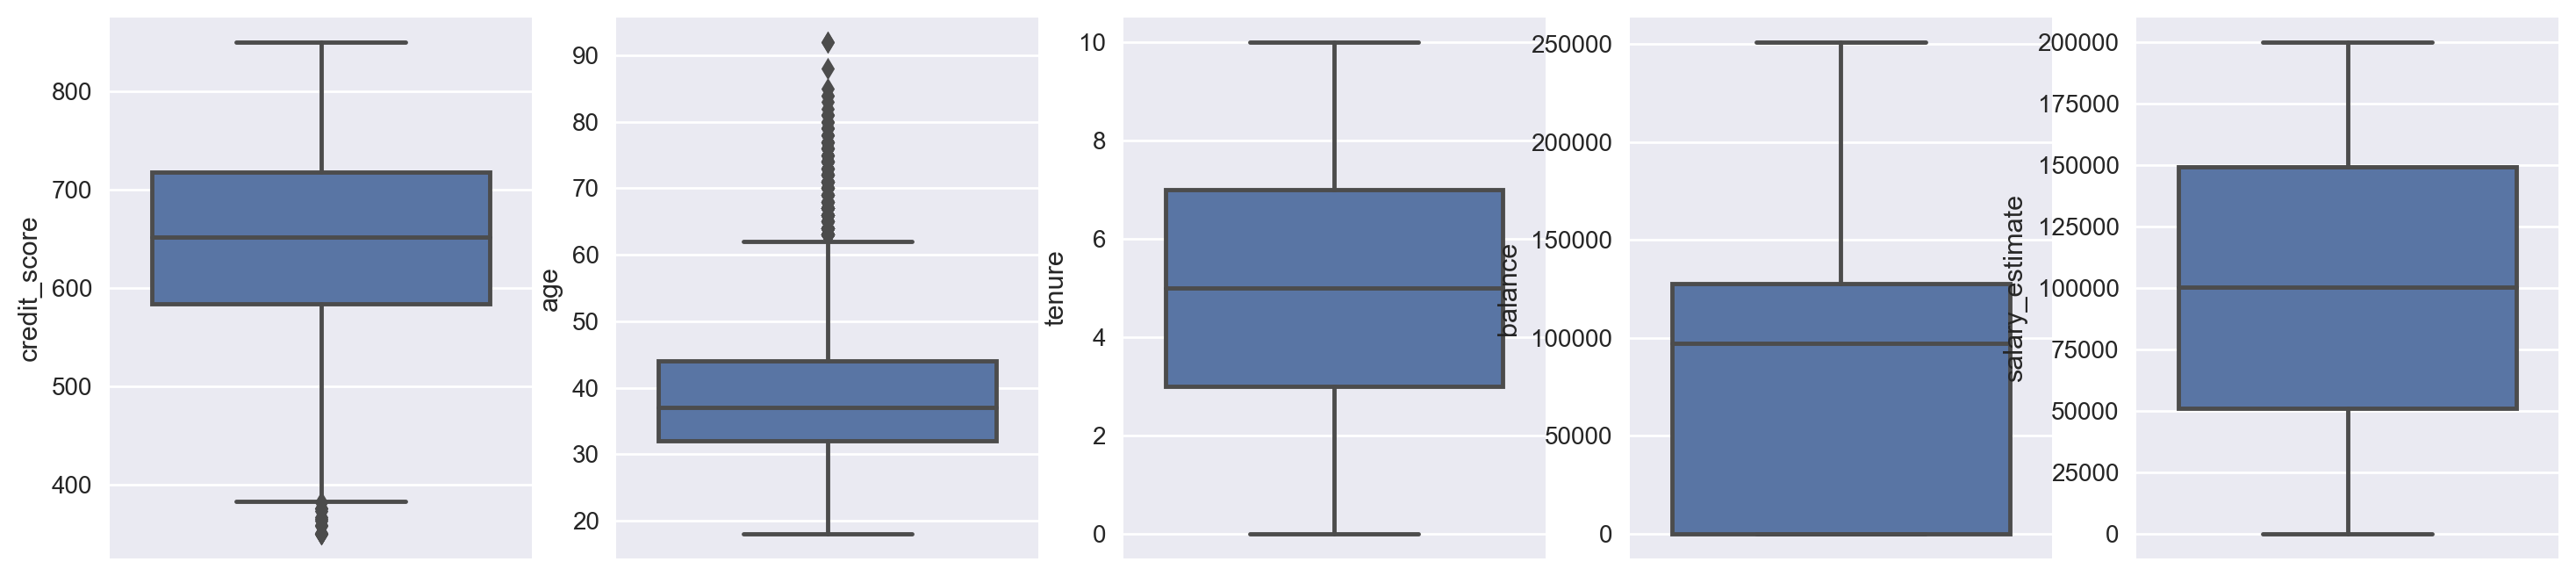

In [22]:
columns = ['credit_score','age','tenure','balance','salary_estimate']
plt.figure(figsize = (18,4))
i = 1
for column in columns:
    plt.subplot(1,5,i)
    sns.boxplot(y=column, data = churncustomer_df)
    i +=1

Inference : We do not have any outliers to be handled in the data

#### Random sampling of data 

This dataset has more than 5000 observations, hence we do a random sampling to obtain only 5000 rows for easy computation. We then display 5 random rows from our cleaned dataset

In [23]:
churncustomer_df = churncustomer_df.sample(n = 5000, random_state = 999)
churncustomer_df.shape

(5000, 11)

In [24]:
#Displaying 5 random rows from our clean data
churncustomer_df.sample(5, random_state = 999)

,credit_score,country,gender,age,tenure,balance,number_of_products,has_creditcard,is_active,salary_estimate,churn
6977,587,Spain,Male,42,5,120233.83,1,1,0,194890.33,0
1784,658,France,Male,36,8,174060.46,1,1,1,94925.62,0
2501,691,Germany,Female,38,5,114753.76,1,1,0,107665.02,0
1953,623,France,Male,21,10,0.00,2,0,1,135851.30,0
2752,698,Spain,Female,31,8,185078.26,1,0,0,115337.74,1


## Data Exploration & Visualisation <a name ='dataexploration'></a>

Our data set has now been cleaned and we are ready to progress into visualising and exploring the features

In [25]:
#defining categorical attributes and numerical attributes for ease of plotting
target_column = ["churn"]
category_column   = churncustomer_df.nunique()[churncustomer_df.nunique() < 6].keys().tolist()
category_column   = [x for x in category_column if x not in target_column]
numeric_column   = [x for x in churncustomer_df.columns if x not in category_column + target_column]
churn     = churncustomer_df[churncustomer_df["churn"] == 1]
not_churn = churncustomer_df[churncustomer_df["churn"] == 0]

### Univariable Visualisation

#### Donut-chart depicting customer churn

In [26]:
#Plotting a donut chart to show churn distribution
type_ = ["Churn", "No Churn"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=churncustomer_df['churn'].value_counts(), name="churn"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=15)

fig.update_layout(
    title_text="Figure 1 :Churn Distributions",font_size=10,
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Churn', x=0.5, y=0.5, font_size=18, showarrow=False)])
fig.show()

#### Bar Chart of Geographical Distribution

We plot the bar chart of countries to understand which country has the highest number of banking customers. As per Figure 1, France has the highest number of customers in the banking sector.

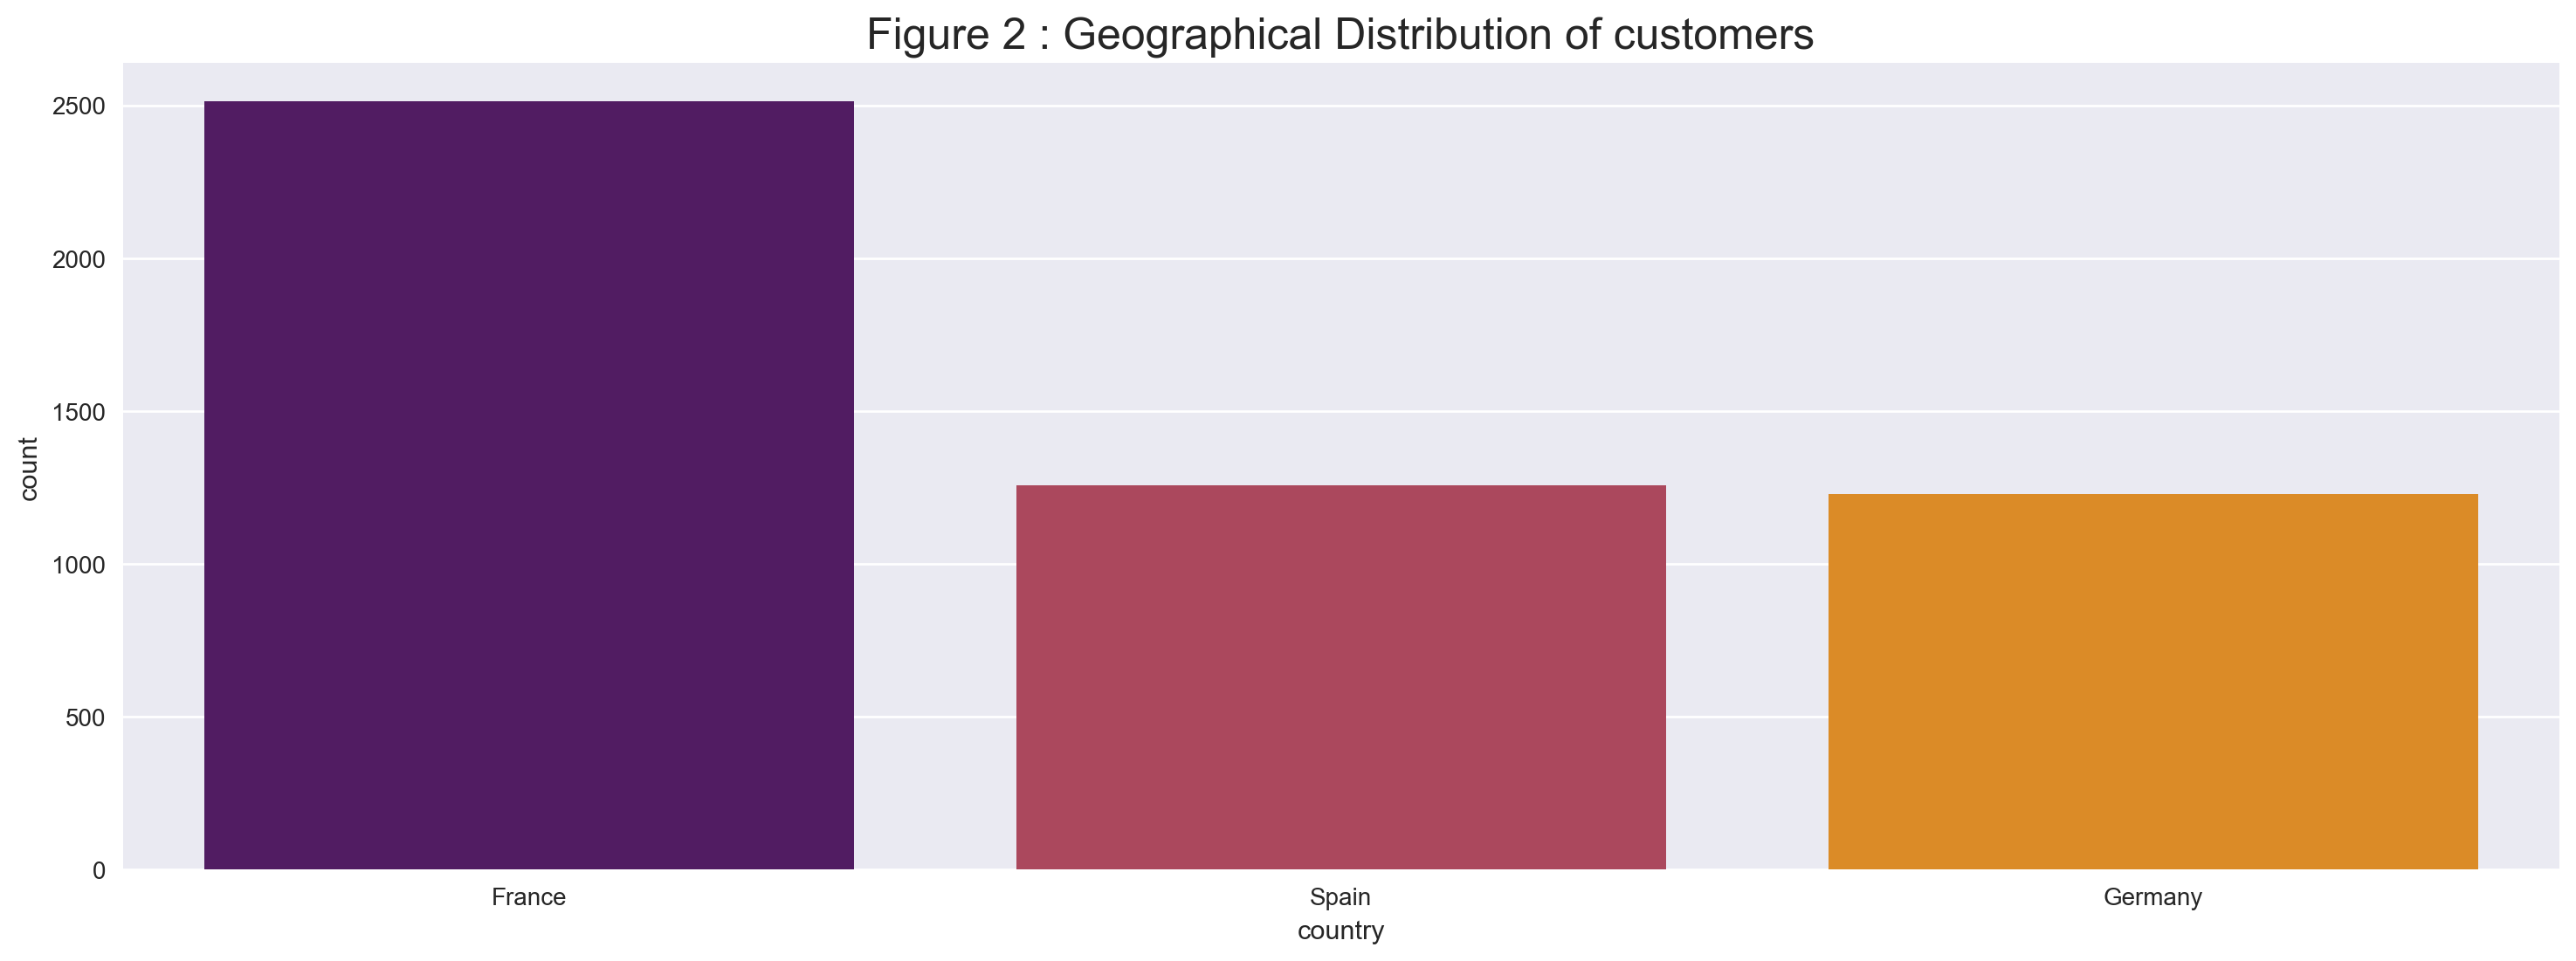

In [27]:
plt.figure(figsize = (18,6))
fig = sns.countplot(x = 'country', data = churncustomer_df, palette = 'inferno',
                   order = churncustomer_df['country'].value_counts().index)
fig = plt.title('Figure 2 : Geographical Distribution of customers', fontsize = 18)
plt.show()

#### Bar Chart of Gender Distribution
    

<div style="text-align: justify"> Next we try to understand the gender distribution among banking customers.<br> Figure 2 shows that majority of the banking customers are males, even though there is only a slight difference between the male and female customer numbers</div>. 

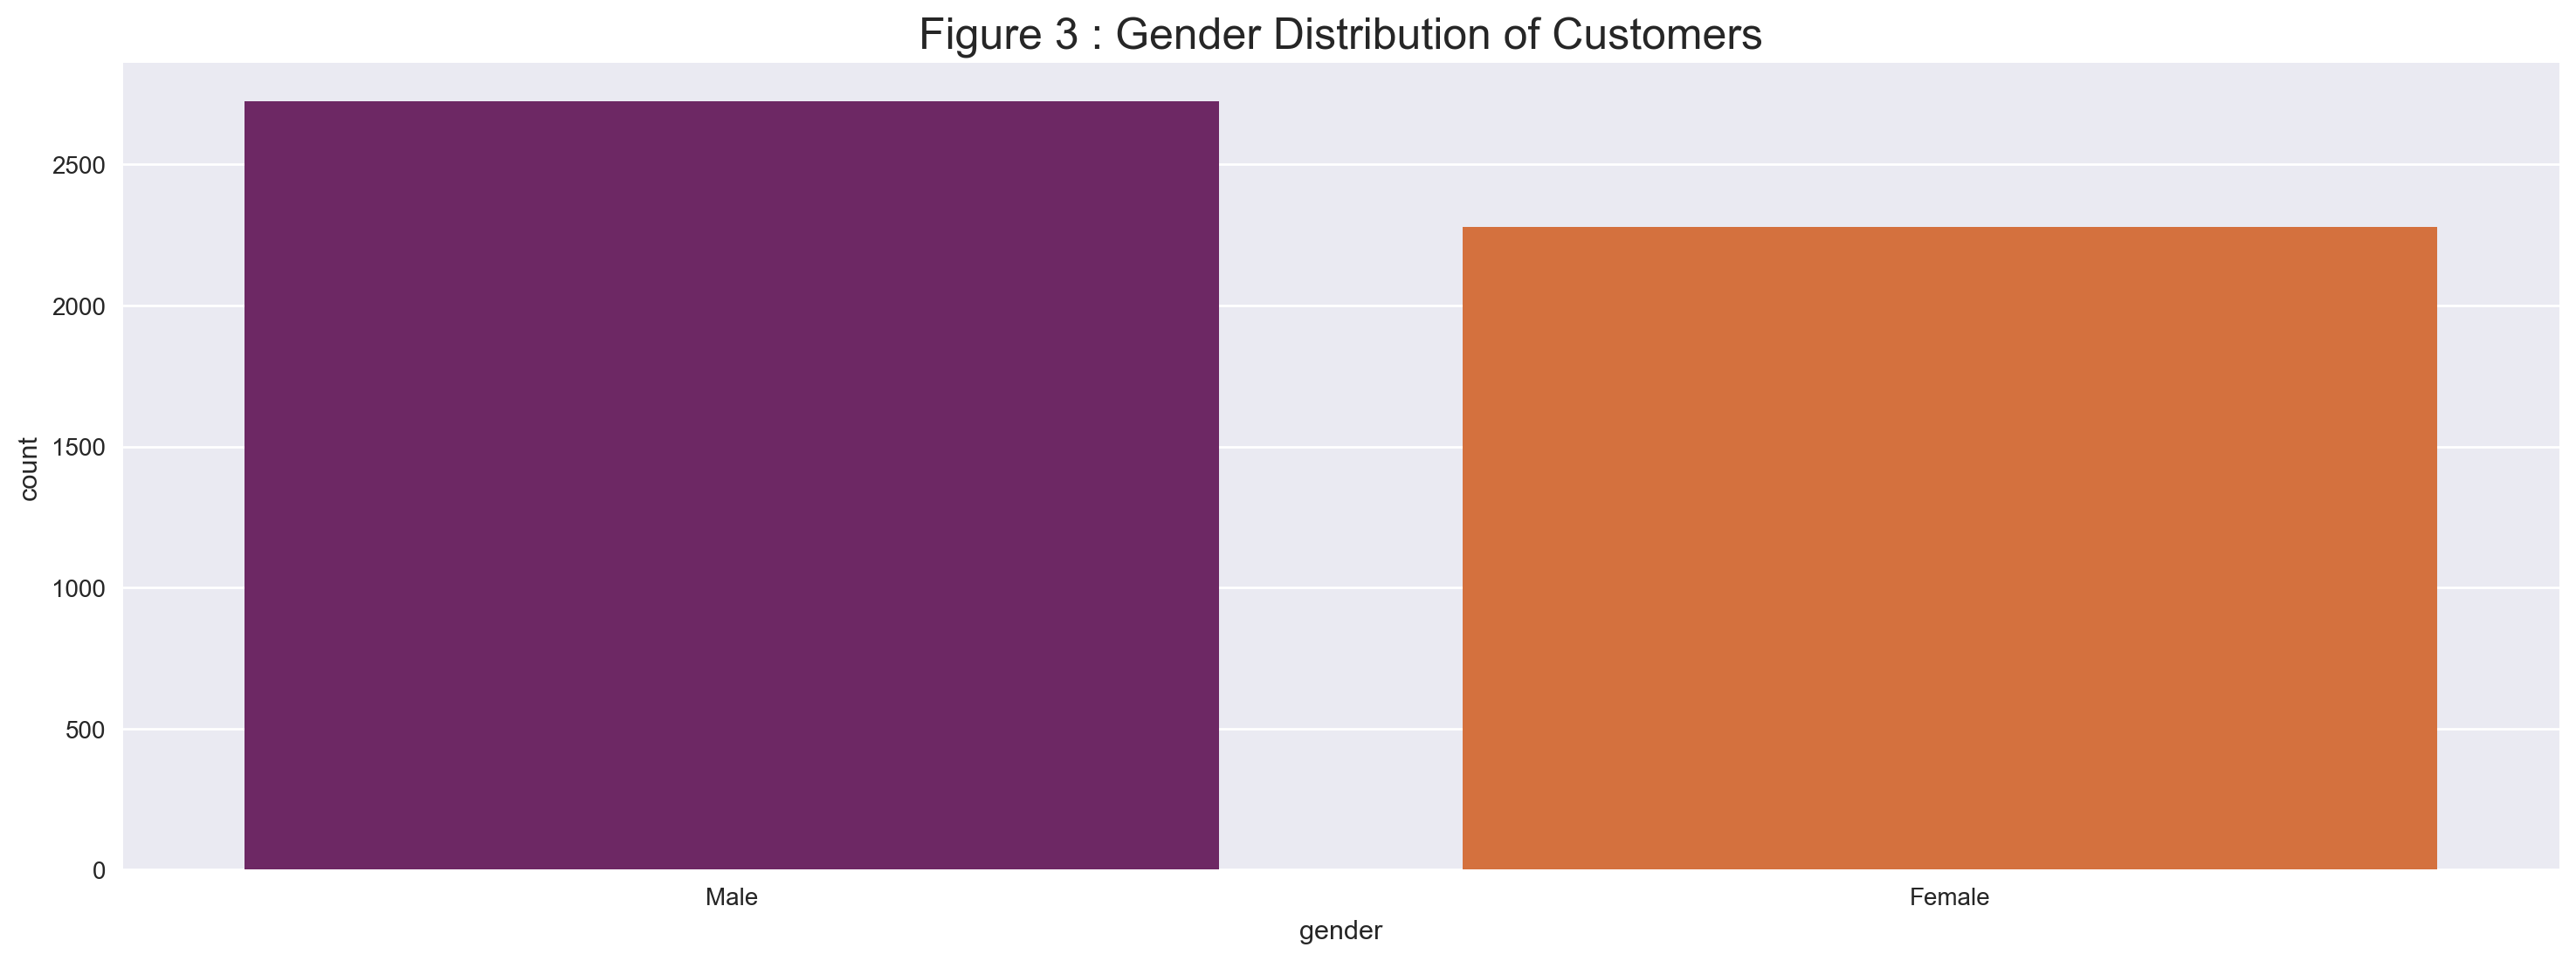

In [28]:
plt.figure(figsize = (18,6))
fig = sns.countplot(x = 'gender', data = churncustomer_df, palette = 'inferno',
                   order = churncustomer_df['gender'].value_counts().index)
fig = plt.title('Figure 3 : Gender Distribution of Customers', fontsize = 18)
plt.show()

#### Bar Chart for customers with credit cards

Here we try to analyse the distribution of customerw with credit cards. As per Figure 4, the number of customers with credit cards is more than the ones without credit cards.

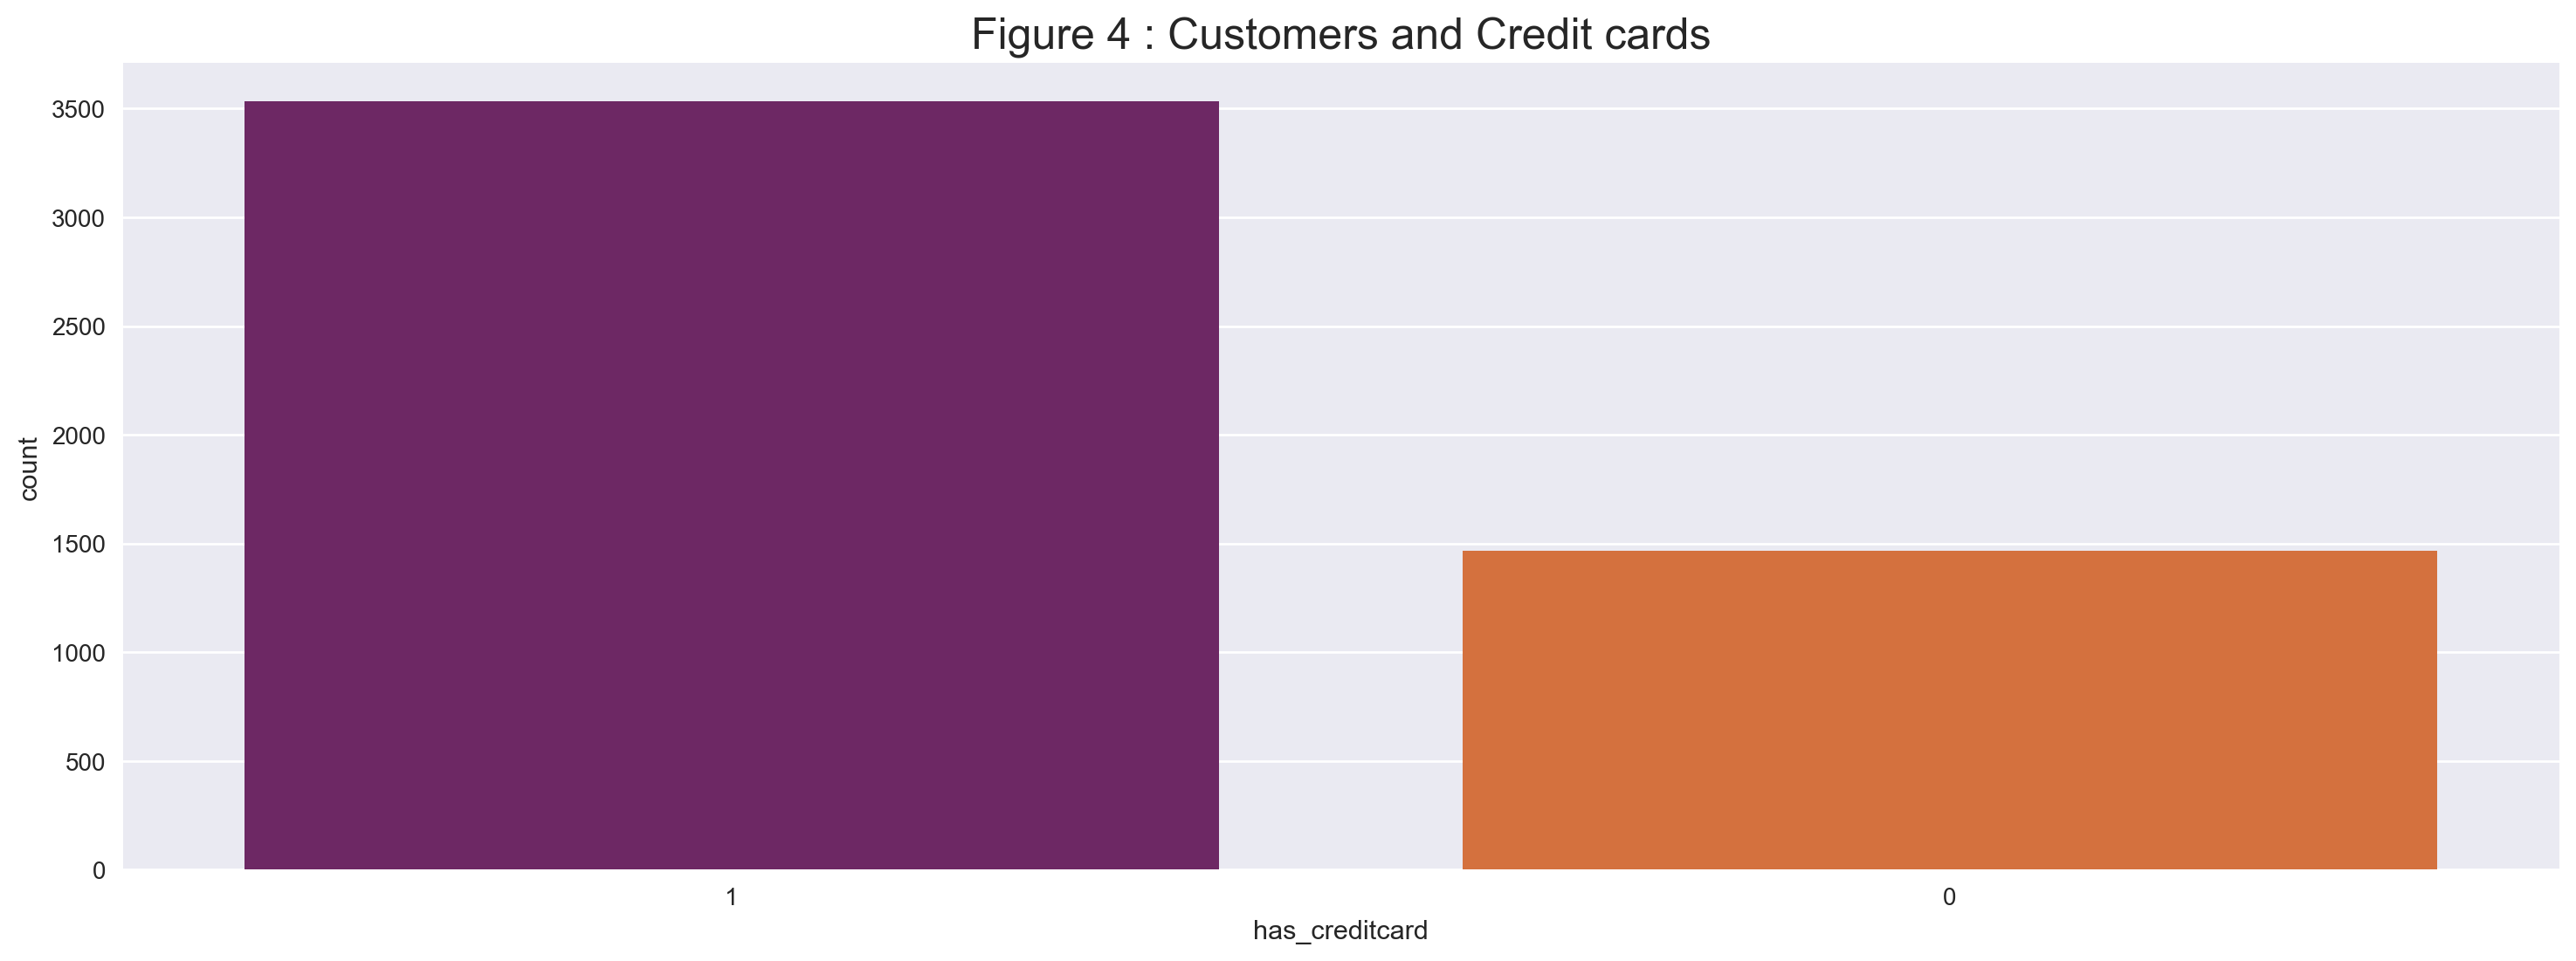

In [29]:
plt.figure(figsize = (18,6))
fig = sns.countplot(x = 'has_creditcard', data = churncustomer_df, palette = 'inferno',
                   order = churncustomer_df['has_creditcard'].value_counts().index)
fig = plt.title('Figure 4 : Customers and Credit cards', fontsize = 18)
plt.show()

### Two variable Visualisation
Now we proceed with two variable visualisation of the attributes in our dataset.

In [30]:
#user defined function to plot histogram
def plot_histogram(column,i) :
    trace1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          name = "Churn Customers",
                          marker = dict(line = dict(width = .5,
                                                    color = "green"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = not_churn[column],
                          histnorm = "percent",
                          name = "Non churn customers",
                          marker = dict(line = dict(width = .5,
                                              color = "green"
                                             )
                                 ),
                          opacity = .9
                         )
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title = "Figure "+i+" : " +column + " distribution in Customer Churn ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)

#### Histogram of credit score with respect to customer churn

As per Figure 5, the credit score and customer churn appears to be normally distributed.

In [31]:
plot_histogram(numeric_column[0],'5')

#### Histogram of tenure with respect to customer churn

<div style="text-align: justify">From Figure 6, we understand that churn rate is relatively low for new customers and customers who have been there for longer period of time. The churn rate is almost similar to non-churn rate for the in between years.</div>

In [32]:
plot_histogram(numeric_column[2],'6')

#### Histogram of balance with respect to customer churn

<div style="text-align: justify">As per Figure 7, balance appears to be normally distributed with churn rate slightly higher in between balances. For very less and very high balance, churn rate is relatively low</div>

In [33]:
plot_histogram(numeric_column[3],'7')

### Three variable visualisation

Now we consider three variable visualisation of our dataset.

#### Boxplot of churn broken down by Tenure and Credit Score

<div style="text-align: justify">From Figure 8, the churn rate and tenure for different credit scores is comparable and has no major difference</div>

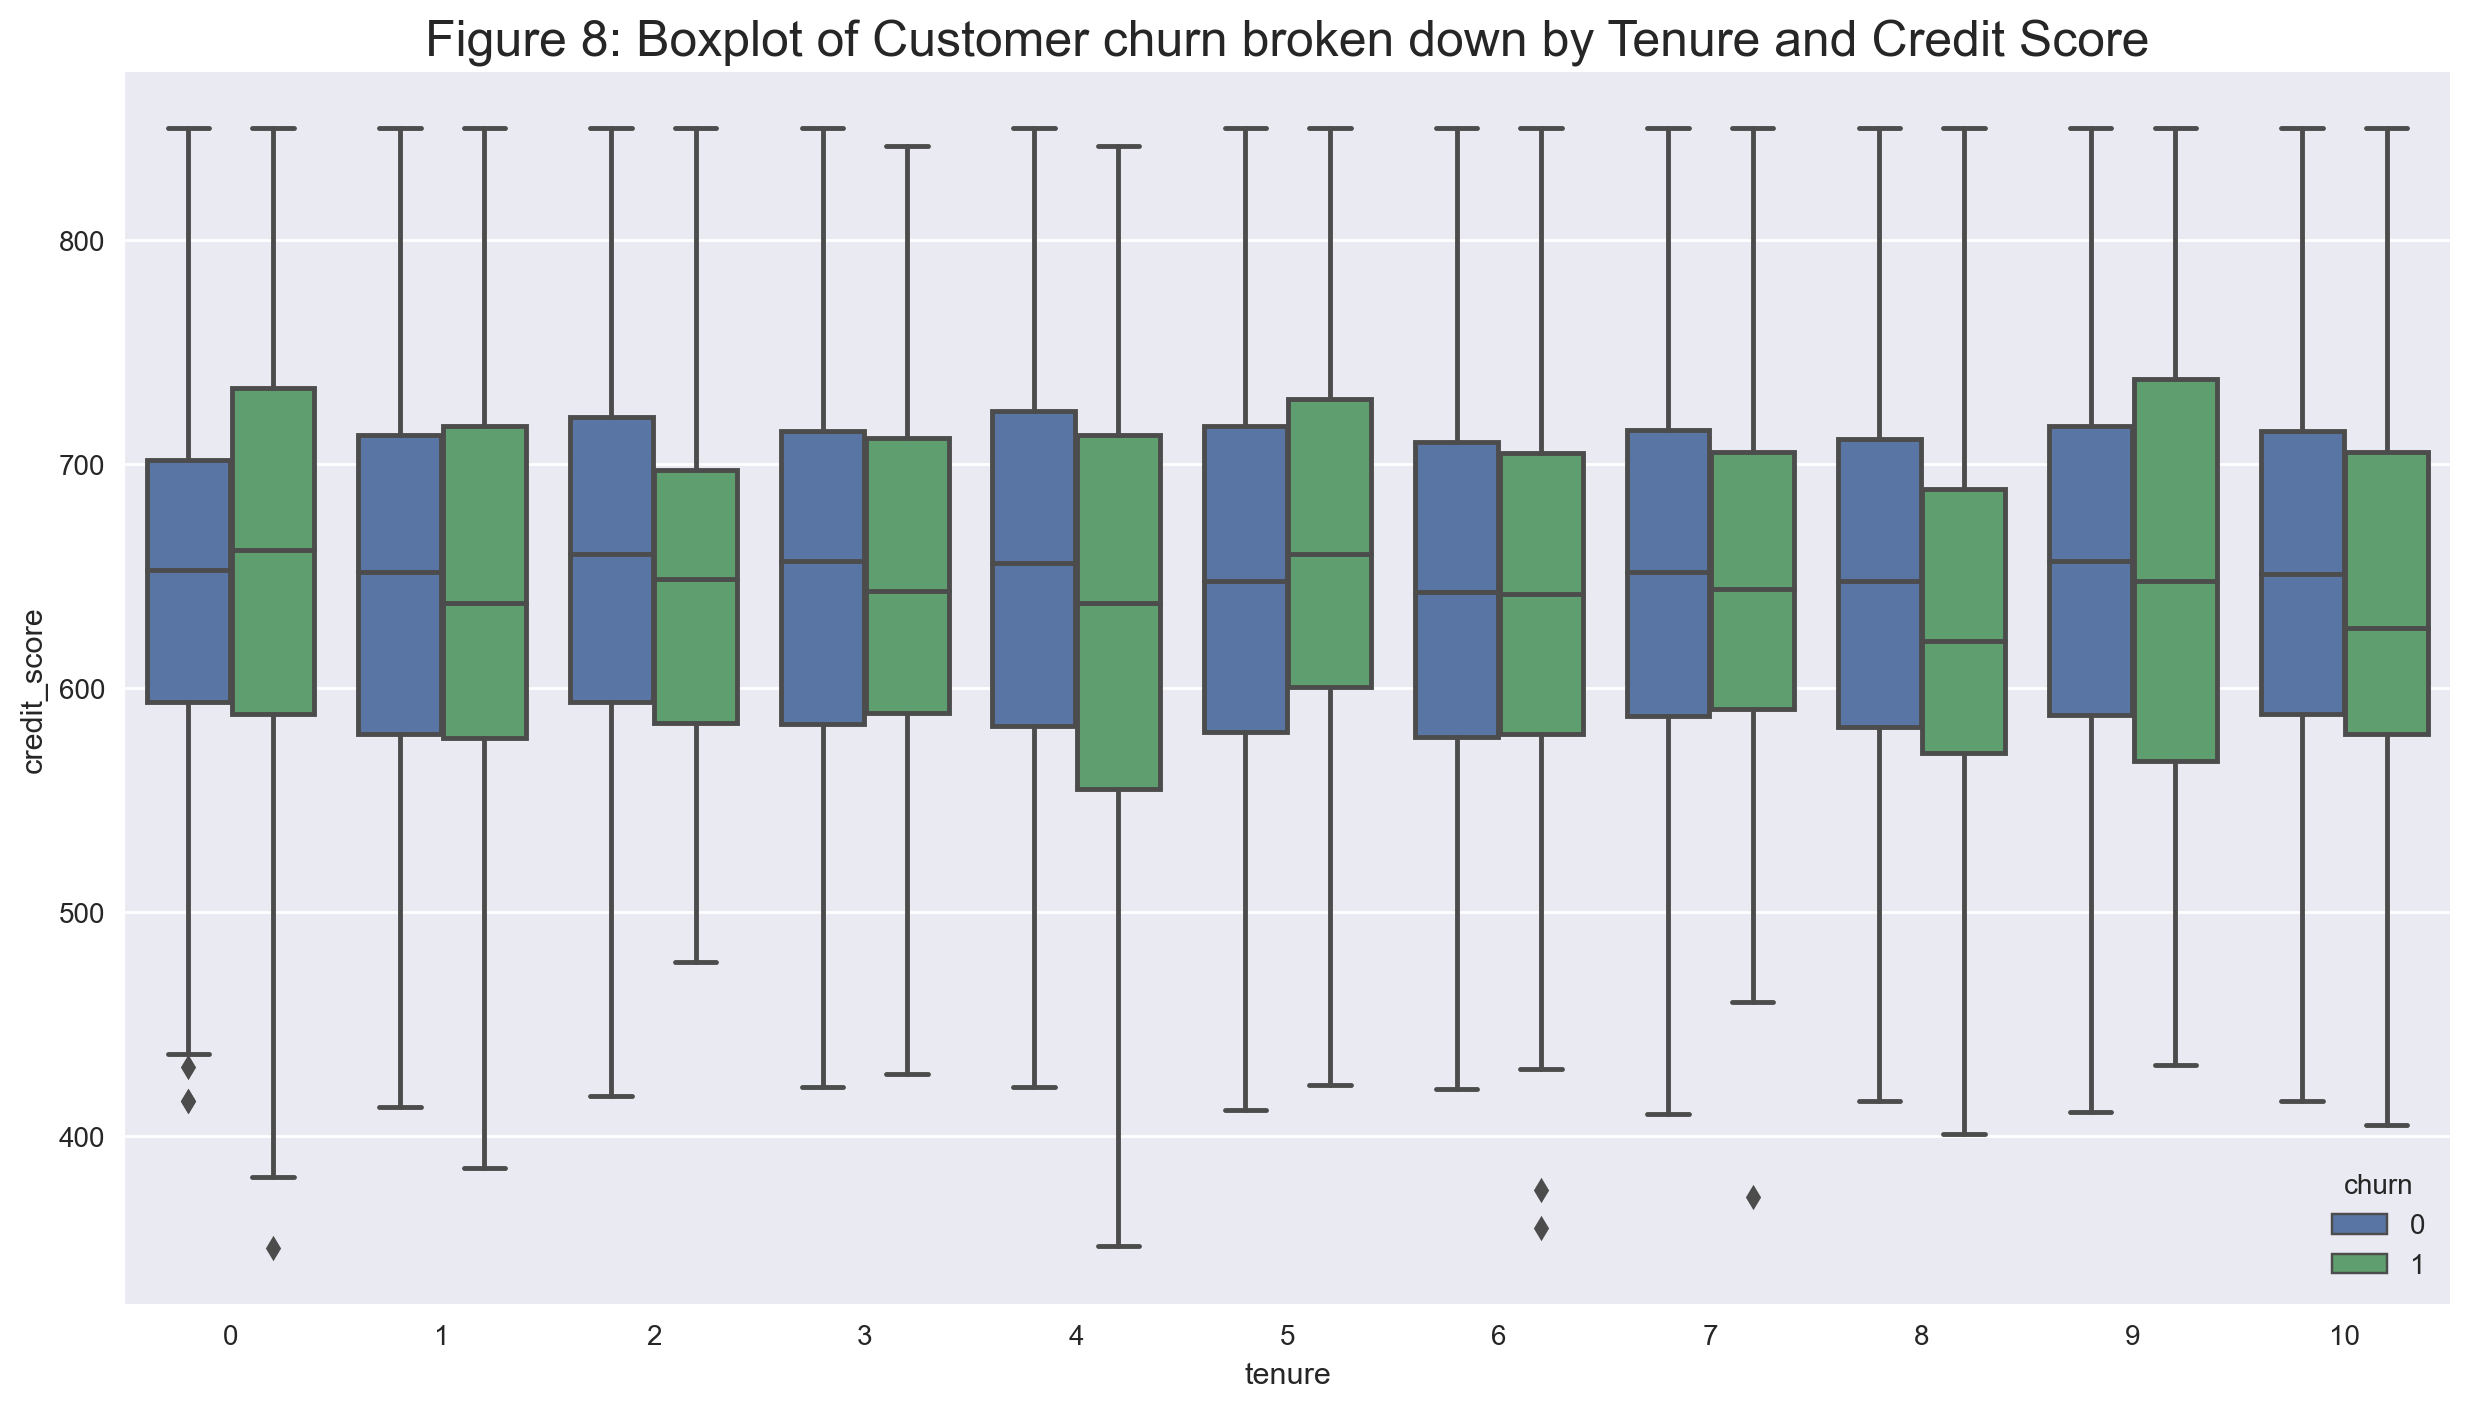

In [34]:
plt.figure(figsize = (15,8))
sns.boxplot(churncustomer_df['tenure'], churncustomer_df['credit_score'], 
            hue = churncustomer_df['churn'])
plt.title('Figure 8: Boxplot of Customer churn broken down by Tenure and Credit Score', fontsize = 18)
plt.show();

#### Barplot of churn with respect to Balance and Tenure

<div style="text-align: justify">Altogether, we see from Figure 9 that churn rate is higher for customers with higher bank balances, but it has no significant pattern on tenure</div>

Text(0, 0.5, 'Balance')

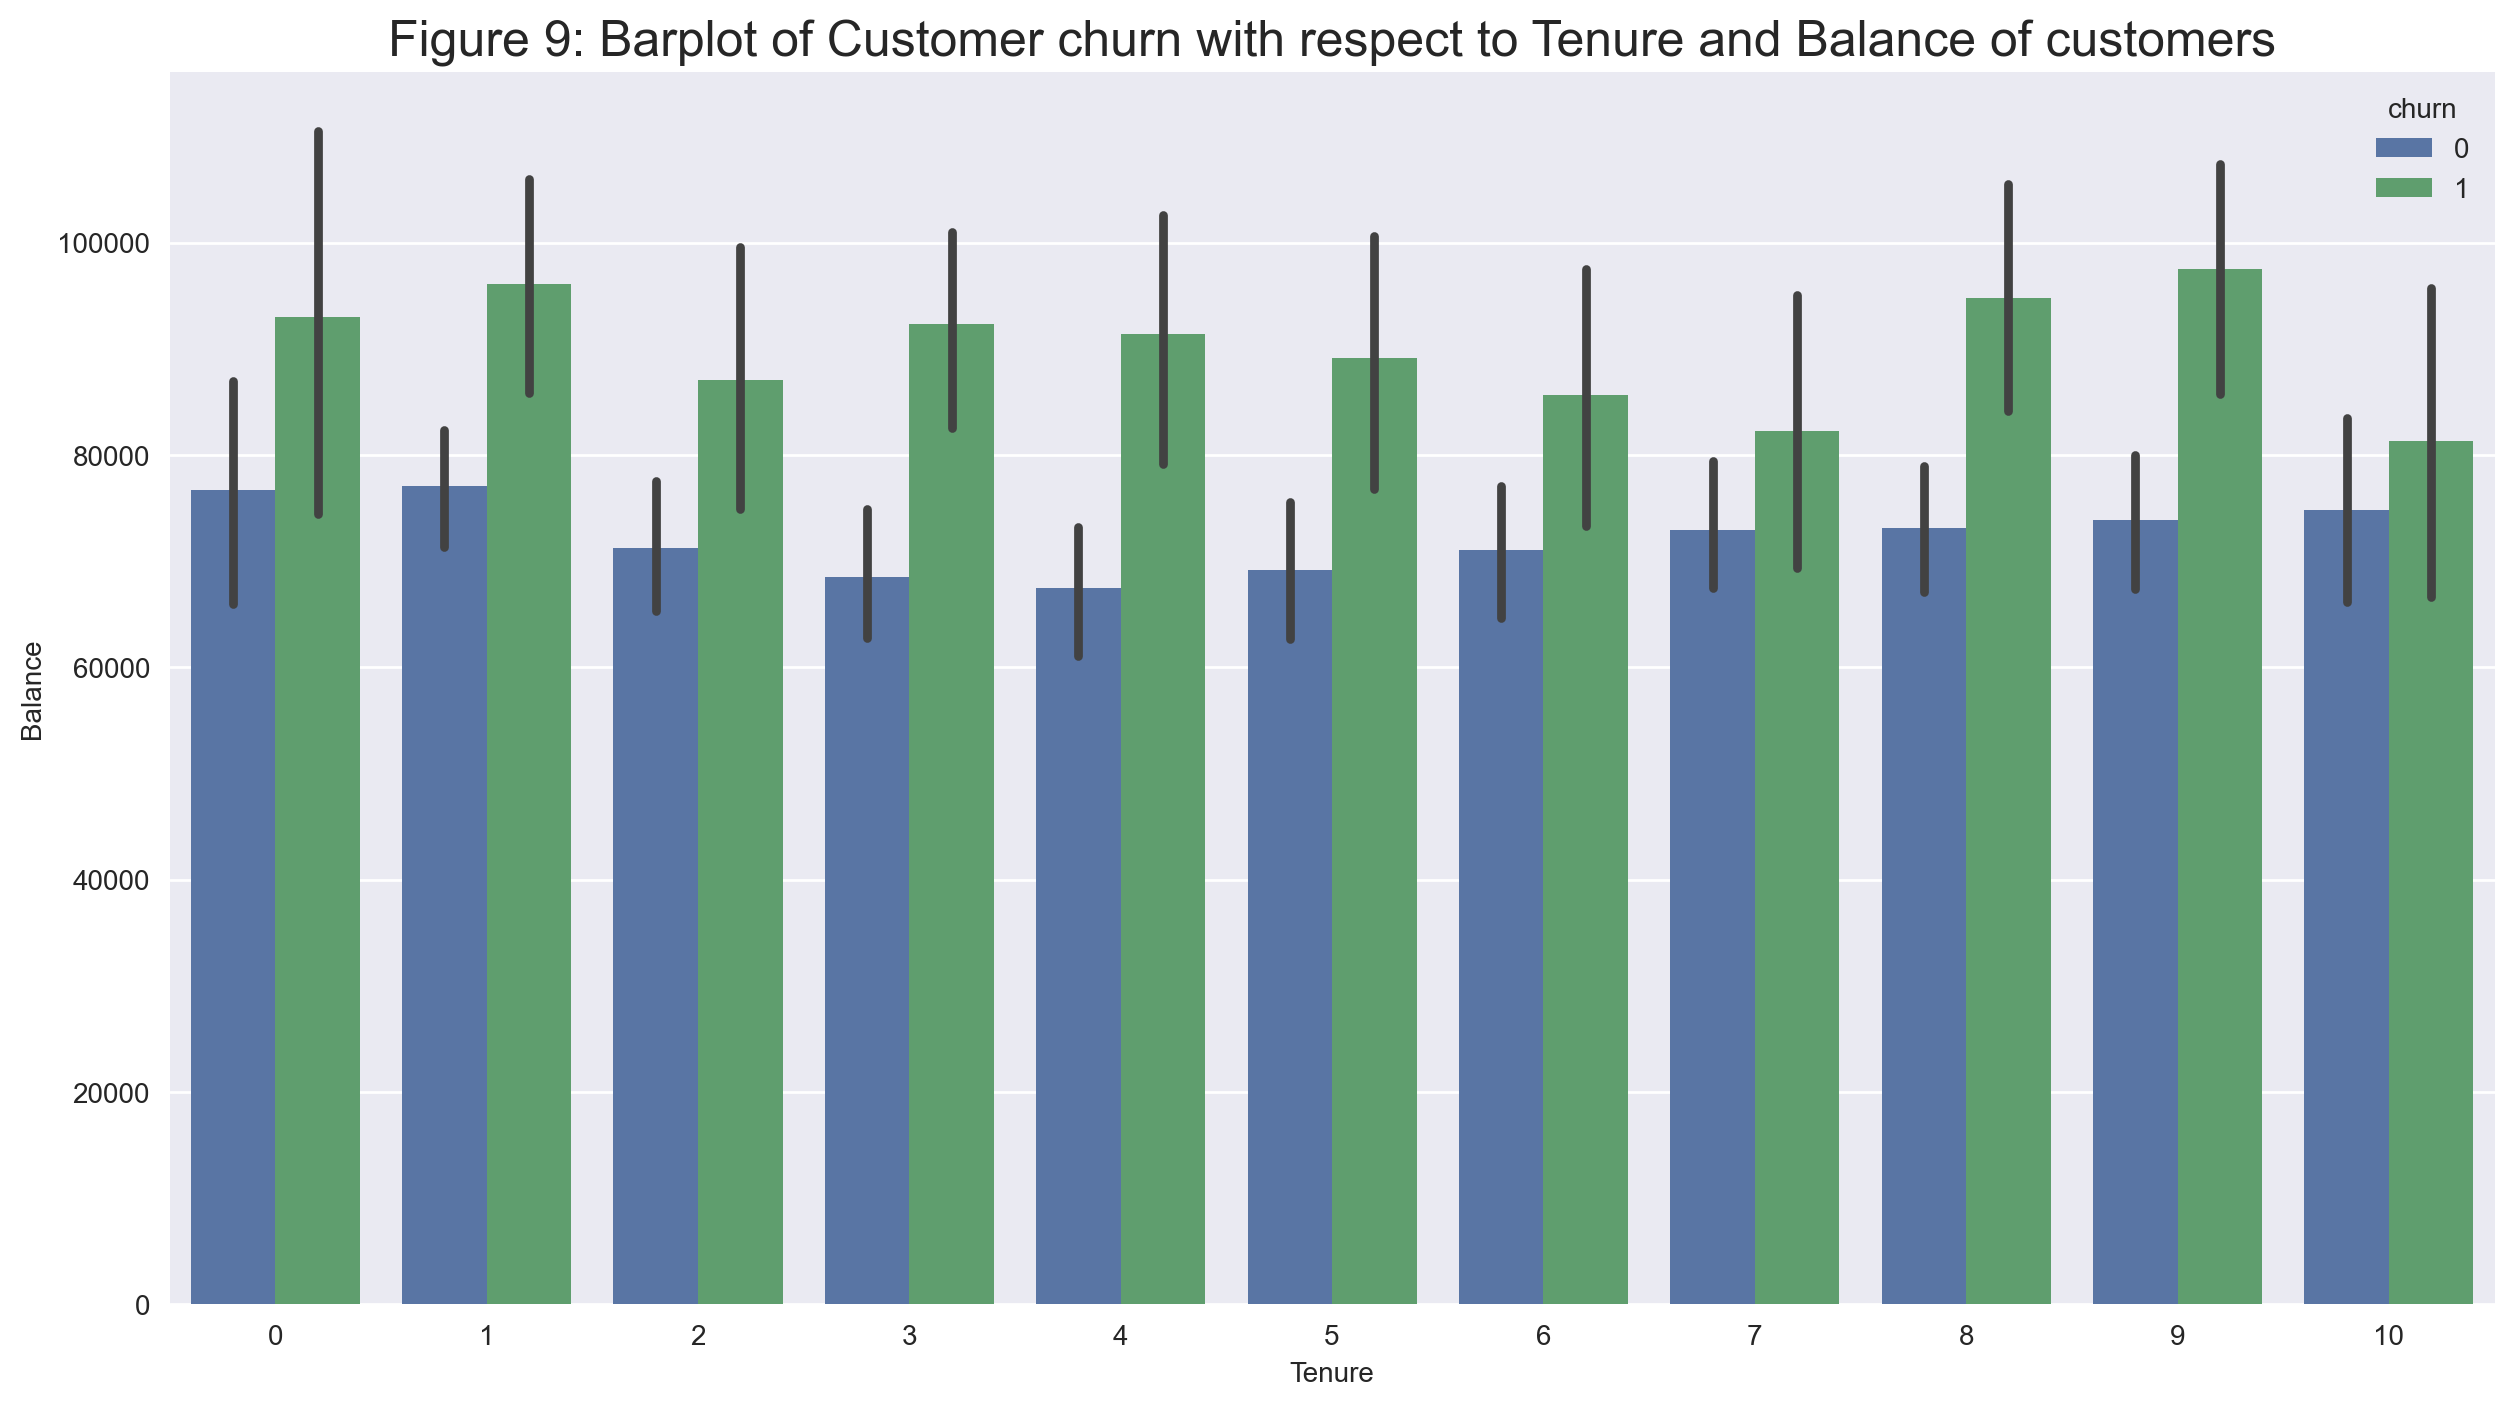

In [35]:
plt.figure(figsize = (15,8))
fig_4 = sns.barplot(x ='tenure', y ='balance', hue = 'churn', data = churncustomer_df)
plt.title('Figure 9: Barplot of Customer churn with respect to Tenure and Balance of customers', fontsize = 18)
plt.xlabel('Tenure', fontsize = 10)
plt.ylabel('Balance', fontsize = 10) 

#### Boxplot of churn rate with respect to Estimted Salary and Number of products used by customers

<div style="text-align: justify">Figure 10 shows that higher salary and more number of products results in higher churn of customers, but otherwise the rate is almost comparable or there exists no significant pattern.</div>

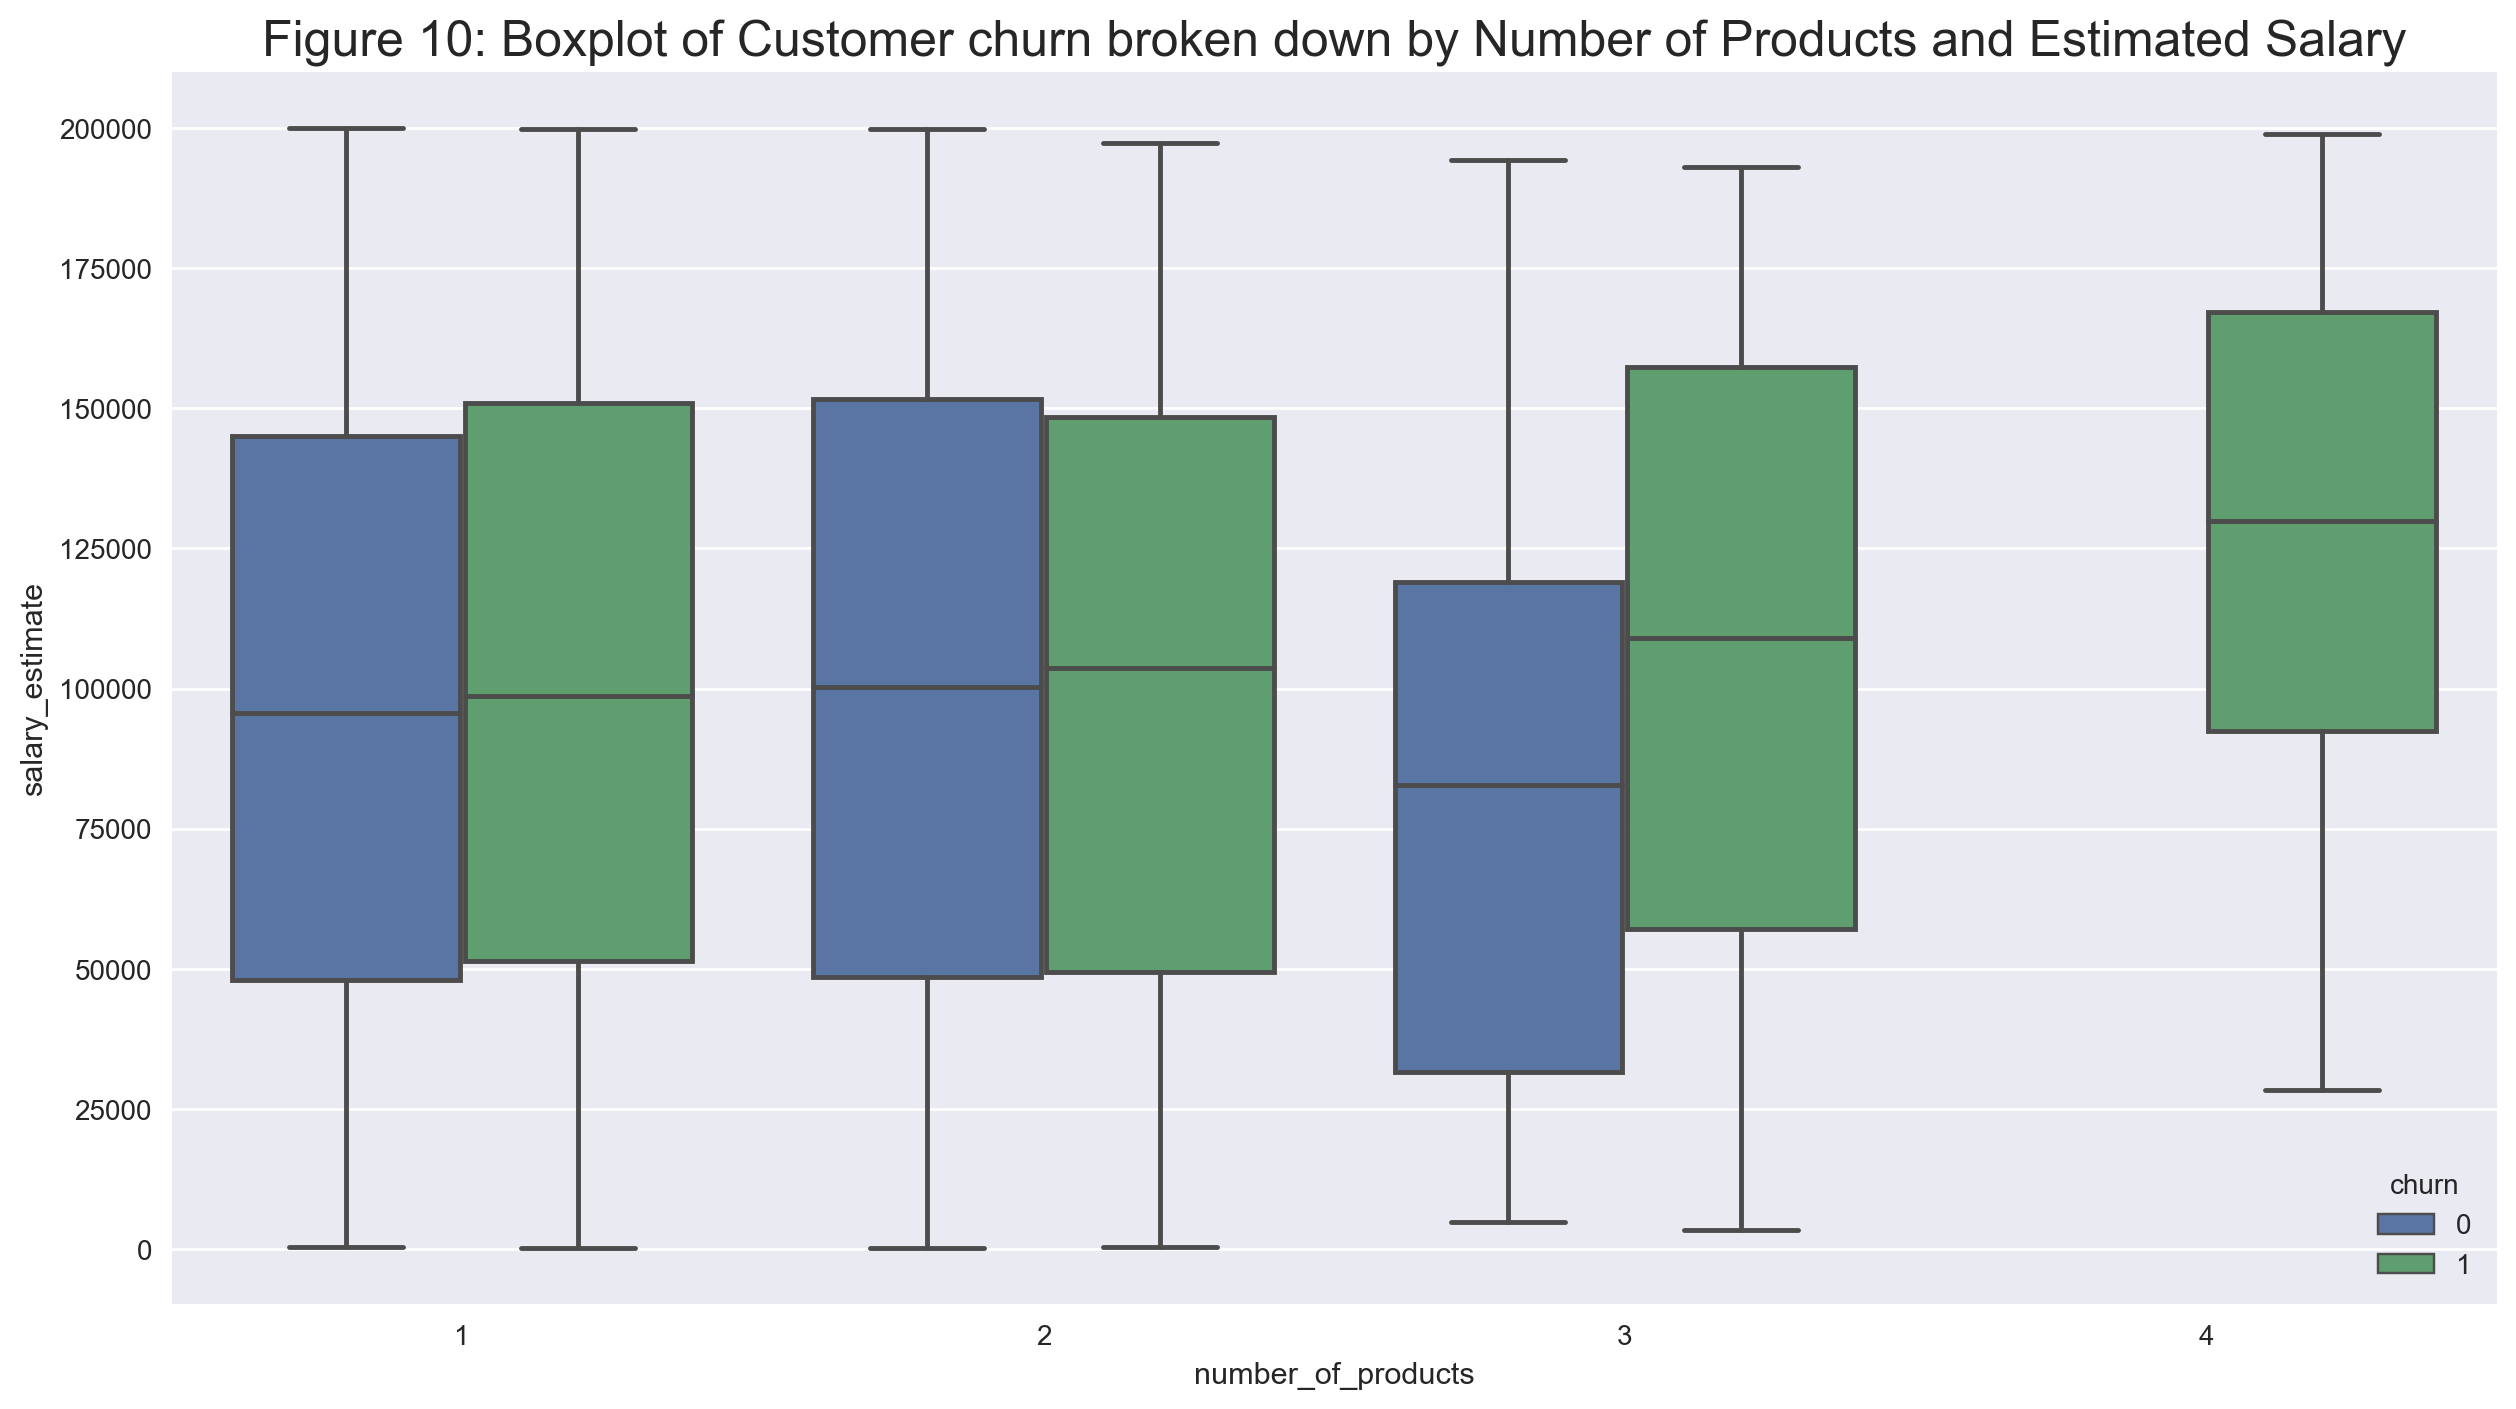

In [36]:
plt.figure(figsize = (15,8))
sns.boxplot(churncustomer_df['number_of_products'], churncustomer_df['salary_estimate'], 
            hue = churncustomer_df['churn'])
plt.title('Figure 10: Boxplot of Customer churn broken down by Number of Products and Estimated Salary', fontsize = 18)
plt.show();

## Literature Review <a name = 'literature'></a>

<div style="text-align: justify">The term Bank customer churn means all the customers who are part of a particular bank and financial institution abandon their services to join a competing company or bank’s services. Nowadays it has become a more frequent problem, that is the loss of many number customers from banks or companies leads to a huge loss for them.
To solve this issue, the Bank customer churn prediction method is used by banks and financial institutions as it can help them retain customers, reduce costs because acquiring new customers cost a lot of money, and improve their profitability. In recent years, a significant amount of research has been conducted on this topic, utilizing various machine learning and data mining techniques.Several studies have used various methods such as logistic regression, decision trees, neural networks, and so on to predict customer churn. Some of the journals are</div><br>

**Predicting Bank Customer Churn: A Comparative Study of Machine Learning Techniques" by Alomari et al. (2021):** -
<div style="text-align: justify">This research paper was published in the International Journal of Advanced Computer Science and Applications in 2021. They used a dataset of Middle Eastern bank that contains 10,000 customer records with 14 features to evaluate their performance using six different machine learning algorithms, including logistic regression, decision tree, k-nearest neighbor, artificial neural network, random forest, and SVM (Support Vector Machine). The outcome demonstrated that ANN (Artificial Neural Network) models got higher accuracy (96.8%) and F1-score (96.9%), which was helpful information for banks and other financial institutions to utilize an ANN model in order to lower churn rates.</div><br>

**Predicting Bank Customer Churn in Egypt using Machine Learning Techniques" by Abd-Elazim et al. (2021):-**
<div style="text-align: justify">This research paper was published in the Journal of King Saud University - Computer and Information Sciences. It develops a model to forecast client turnover in Egypt's banking industry. A dataset with 15,000 customer records and 14 characteristics was employed by the authors. Six different machine learning algorithms were used for the evaluation of their performance. The results demonstrated that, with an accuracy of 92.8% and an F1-score of 93.1%, the random forest approach outperformed the other techniques. The average balance, the number of transactions, and the client's age were found to be the three most significant characteristics influencing customer churn.</div><br>

**Customer Churn Prediction in Banking Industry Using Data Mining Techniques" by Singh and Goyal (2020): -**
<div style="text-align: justify">This research paper was published in the International Journal of Advanced Science and Technology in 2020. This study aimed to develop a customer churn prediction model using 5 data mining techniques like logistic regression, decision tree, random forest, k-nearest neighbor, and ANN with a private bank dataset in India which includes 10,000 customer records with 14 features. The dataset was divided into training and testing sets and the data mining techniques were applied to the training set. The results showed that the decision tree and logistic regression models achieved the highest accuracy of 89% and 88%, respectively which concludes that decision trees and logistic regression models can provide accurate predictions for this churn data.</div><br>

**Predicting Customer Churn in Banking Industry Using Ensemble Learning and SMOTE" by Song et al. (2020): -**
<div style="text-align: justify">It is a research paper published in the Journal of Intelligent and Fuzzy Systems in 2020. They created the model utilizing SMOTE and ensemble learning. (Synthetic Minority Over-sampling Technique). They obtained a dataset of 10,000 client records from a Chinese bank with 5 attributes for this purpose. The preprocessed dataset was split into training and testing sets after all the missing values and outliers were eliminated. The training set was then subjected to the application of four different ensemble learning techniques, including bagging, boosting, random forest, and stacking. Since the number of lost customers was substantially lower than the number of kept customers, SMOTE was also used to balance the dataset's class distribution. The outcomes demonstrated that ensemble learning techniques had high success rates. They also applied SMOTE to balance the class distribution of the dataset since the number of churned customers was much smaller than the number of retained customers. The results showed that ensemble learning methods were highly accurate, with Random Forest having the best accuracy (98.6%). SMOTE additionally enhanced the models' performance by balancing the dataset's class distribution. They concluded that SMOTE and ensemble learning techniques can accurately anticipate client attrition in the banking industry.</div><br>

**Customer Churn Prediction in Banking Industry: A Comparative Study of Supervised Learning Models" by Wu and Chen (2020):-**
<div style="text-align: justify">This research paper was published in the International Journal of Financial Studies in 2020. They used different supervised learning models in predicting customer churn in the banking industry. They obtained a dataset from a Chinese bank that included 10,000 client records with specific characteristics. The preprocessed dataset was split into training and testing sets after missing values and outliers were removed. The training set was then subjected to the application of six different supervised learning models, including Logistic Regression, Decision Tree, Random Forest, SVM, k-NN, and ANN. According to the data, Random Forest had the highest accuracy in predicting customer turnover (96.47%), followed by SVM (95.79%). To determine the most crucial features for churn prediction, the researchers also carried out a feature importance analysis. The study concluded that the best techniques for this churn data prediction are Random Forest and SVM.</div><br>

**Bank Customer Churn Prediction Using Deep Learning: A Comparative Study" by Saravanan et al. (2020): -**
<div style="text-align: justify">This research paper was published in the International Journal of Advanced Intelligence Paradigms. They used different deep learning models to compare which will have the highest accuracy and F-1 score so that the banking sector can use that method for predicting customer churn. They gathered a 10,000-record banking dataset with 14 features for this. For assessing their performance, they used four deep learning models: a feedforward neural network, a convolutional neural network, a long short-term memory, and a gated recurrent unit. According to the findings, the feedforward neural network model had the highest accuracy (92.4%) and F1 score (92.6%). The study also determined the most crucial elements influencing customer turnover, including the customer's age, the volume of transactions, and the account balance.</div><br>

**Customer Churn Prediction for Banking Sector: A Comparative Analysis" by Pal et al. (2019): -**
<div style="text-align: justify">It is a research paper published in the Journal of Data, Information, and Management in 2019. The goal of the study was to create a model for predicting customer attrition in the Indian banking industry. They gathered a dataset with 10,000 customer records and 21 features for this. The researchers separated the dataset into training and testing sets and applied six different machine learning algorithms to the training set, including Decision Tree, Random Forest, Naive Bayes, Logistic Regression, Support Vector Machine (SVM), and k-Nearest Neighbor (k-NN). The findings indicate that the Random Forest algorithm, with a prediction accuracy of 96.55%, outperformed SVM, which had a prediction accuracy of 96.09%. where they draw the conclusion that SVM and Random Forest are the most efficient algorithms.</div><br>

**A Hybrid Approach for Bank Customer Churn Prediction" by Abdelmoula and Jarray (2019): -**
<div style="text-align: justify">It is a research paper published in the Journal of Ambient Intelligence and Humanized Computing in 2019. They made use of a set of 10,000 customer records from Tunisian banks with 13 attributes. They used a hybrid strategy that includes decision tree and support vector machine (SVM) models to predict client churn. The dataset was split into training and testing sets. The training dataset was subjected to the hybrid technique. The hybrid technique was divided into two phases: the decision tree model was used in the first phase to identify the key features that influence customer churn, and the SVM model was used in the second phase to forecast customer churn based on the selected features. The effectiveness of the hybrid technique and the decision tree was also compared by the researchers. According to the study's findings, the hybrid technique had a prediction accuracy of 95.4%, which was higher than the decision tree model's 92.8% and the SVM model's 94.3%.</div><br>

**Customer Churn Prediction in Banking Industry Using Machine Learning Techniques" by Kaur and Kaur (2019): -**
<div style="text-align: justify">It is a research paper published in the International Journal of Innovative Technology and Exploring Engineering in 2019. The study used four distinct machine learning models, including decision trees, k-nearest neighbors, logistic regression, and random forests, to predict customer churn. 10,000 customer records with 16 features were collected as part of the dataset, which was split into training and testing sets. The study's findings revealed that the random forest model had the highest accuracy in predicting customer churn, coming in at 96.72%. According to the study's findings, machine learning algorithms may accurately forecast client attrition in the banking sector. The outcomes also imply that the decision tree and random forest models can make precise predictions for this task.</div><br>

**Bank Customer Churn Prediction Using Artificial Neural Networks and Logistic Regression" by Al-Ahmad and Al-Ali (2018): -** <div style="text-align: justify">This is a research paper published in the Journal of Financial Services Marketing in 2018. The goal of the study was to use logistic regression and artificial neural networks (ANN) to create a prediction model for a bank in Jordan. A dataset of 10,000 customer records and 12 attributes was gathered by them. The dataset was split into training and testing sets, and the training set was used to apply the ANN and logistic regression models. According to the study's findings, the logistic regression model had an accuracy of 88.76%, while the ANN model had the best accuracy of 94.63% in forecasting customer turnover. The conclusion is that for this prediction, the ANN model can offer more precise predictions than logistic regression.</div><br>

<div style="text-align: justify">Overall, the literature on bank customer churn prediction suggests that machine learning, and data mining techniques are effective for predicting customer churn. However, the choice of the most suitable method depends on various factors such as the size of the dataset, the number of features and so on.</div>

## Summary and Conclusion <a name = 'summary'></a>

<div style = 'text-align: justify'>Predicting the churn of bank customers can be a complex task, but it has many practical applications to the stakeholders like customer retention, risk management, better marketing strategies, proper resource allocation, gaining a competitive advantage and many more. Our main objective in this project is to analyze if we can device a reliable model for predicting the customer churn in the Bank Customer data set.<br><br>
In Phase I of the project we have done data cleaning, preprocessing and data visualisation. We have dropped irelevent variables like RowNumber, Customerid and Surname. We checked the data for missing values and outliers and found our data to be clean. We later sampled the data to obtain 5000 random rows to run models in the later phase of the project.<br><br>
In the next stage we proceeded to generate meaningful visualisations to further explore the data. We analysed the over all churn rate, geographical, gender and credit card distribution of the customers in the data set. We then proceeded to find out the significance of credit score, customer tenure and balance in determining the customer churn. We also analysed the impact of the number of banking products used by the customers and the estimated salary in the customer churn rate.<br><br>
We have found that credit score, tenure and number of products are few of the most significant features in understanding the customer churn, but we still need to do further analysis to identify further relationships and patterns.

## References <a name = 'references'></a>

* Pradnya Patil (December 30, 2019 [Bank-customer-churn-prediction(Github)] Retrieved  from https://github.com/Pradnya1208/Bank-customers-churn-prediction/blob/main/data.csv

* Singh and Goyal (2020) [Customer Churn Prediction in Banking Industry Using Data Mining Techniques]Retrieved from https://www.sciencedirect.com/science/article/abs/pii/S0957417420301702

* Al-Ahmad and Al-Ali (2018) [Bank Customer Churn Prediction Using Artificial Neural Networks and Logistic Regression] Retrieved from https://link.springer.com/article/10.1057/s41264-018-0044-7

* Abdelmoula and Jarray (2019)[A Hybrid Approach for Bank Customer Churn Prediction] Retrieved from https://ieeexplore.ieee.org/document/8815509

* Kaur and Kaur (2019) [Customer Churn Prediction in Banking Industry Using Machine Learning Techniques] Retrieved from https://link.springer.com/chapter/10.1007/978-981-13-9182-3_11

* Pal et al. (2019) [Customer Churn Prediction for Banking Sector: A Comparative Analysis" ] Retrieved from https://www.sciencedirect.com/science/article/pii/S2405452618312982

* Alomari et al. (2021) [A Comparative Study of Machine Learning Techniques for Bank Customer Churn Prediction] Rerieved from https://www.mdpi.com/2071-1050/13/8/4234

* Song et al. (2020) [Predicting Customer Churn in Banking Industry Using Ensemble Learning and SMOTE" ]  Retrievd from https://www.mdpi.com/1999-4893/13/6/130

* Abd-Elazim et al. (2021) [Predicting Bank Customer Churn in Egypt using Machine Learning Techniques] Retrieved from https://www.sciencedirect.com/science/article/pii/S1568494621001523

* Wu and Chen (2020) [Customer Churn Prediction in Banking Industry: A Comparative Study of Supervised Learning Models] Retrieved from https://www.sciencedirect.com/science/article/pii/S2405452620307547

* Saravanan et al. (2020) [Bank Customer Churn Prediction Using Deep Learning: A Comparative Study" ] Retrived from https://link.springer.com/article/10.1007/s42452-020-2162-4

* Kostas Diamantaras(2015)[ A Comparison of Machine Learning Techniques for Customer Churn Prediction” ] Retrieved from https://www.researchgate.net/publication/273439405_A_Comparison_of_Machine_Learning_Techniques_for_Customer_Churn_Prediction
